In [3]:
from langgraph.checkpoint.memory import InMemorySaver
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from typing import TypedDict
from langgraph.graph import START, END, StateGraph

In [ ]:
load_dotenv()
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

In [8]:
class JokeState(TypedDict):
    topic: str
    joke : str
    explanation: str

In [9]:
def generate_joke(state: JokeState)-> JokeState:
    prompt=f"""generate a joke on the topic- {state["topic"]}"""
    response = llm.invoke(prompt)
    return {"joke":response.content}

def generate_explanation(state:JokeState)-> JokeState:
    prompt=f"""write an explanation for this joke- {state["joke"]}"""
    response = llm.invoke(prompt)
    return {"explanation": response.content}

In [11]:
graph = StateGraph(JokeState)

graph.add_node("generate_joke", generate_joke)
graph.add_node("generate_explanation", generate_explanation)

graph.add_edge(START, "generate_joke")
graph.add_edge("generate_joke", "generate_explanation")
graph.add_edge("generate_explanation", END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

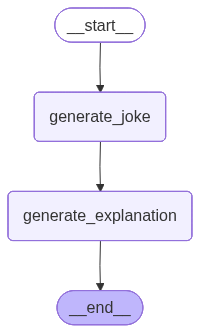

In [12]:
workflow

In [14]:
config1 = {"configurable": {"thread_id":"1"}}
workflow.invoke({"topic":"pizza"}, config=config1)

{'topic': 'pizza',
 'joke': 'Why did the pizza get a job?\n\nBecause it kneaded the dough!',
 'explanation': 'This joke is a classic pun that plays on two meanings of the phrase "kneaded the dough!"\n\nHere\'s the breakdown:\n\n1.  **The Pizza-Making Connection:**\n    *   When you make pizza, you literally have to **knead** (work with your hands) the **dough** (the mixture that forms the crust). So, from a pizza\'s perspective, "kneading the dough" is a very natural and necessary activity.\n\n2.  **The Financial Connection (The Pun):**\n    *   The word "**kneaded**" sounds exactly like "**needed**" (as in, to require something).\n    *   The word "**dough**" is common slang for **money**.\n    *   Therefore, "kneaded the dough" sounds like "needed the money."\n\n**The Joke\'s Humor:**\n\nThe joke works by setting up an expectation for a human reason for getting a job (needing money), and then delivering a punchline that cleverly connects that human reason to a literal action associat

In [105]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the doctor? Because it was feeling a little saucy!', 'explanation': 'This joke plays on the double meaning of the word "saucy." In one sense, "saucy" can mean bold, impertinent, or sassy. But in the context of a pizza, "saucy" refers to the tomato sauce typically used as a base on pizzas. So when the pizza went to the doctor because it was feeling "saucy," it implies that the pizza was not feeling well due to too much sauce, rather than being bold or sassy. The humor comes from the unexpected twist on the word\'s meaning.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06cc6e-93a2-6a08-8002-395e36be0f5e'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': '1'}, created_at='2025-07-29T21:56:42.071296+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06cc6e-7a2f-60ea-8001-4ac26c539f8d'}}, tasks=(), inte

In [106]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the doctor? Because it was feeling a little saucy!', 'explanation': 'This joke plays on the double meaning of the word "saucy." In one sense, "saucy" can mean bold, impertinent, or sassy. But in the context of a pizza, "saucy" refers to the tomato sauce typically used as a base on pizzas. So when the pizza went to the doctor because it was feeling "saucy," it implies that the pizza was not feeling well due to too much sauce, rather than being bold or sassy. The humor comes from the unexpected twist on the word\'s meaning.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06cc6e-93a2-6a08-8002-395e36be0f5e'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': '1'}, created_at='2025-07-29T21:56:42.071296+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06cc6e-7a2f-60ea-8001-4ac26c539f8d'}}, tasks=(), int

In [107]:
config2 = {"configurable": {"thread_id": "2"}}
workflow.invoke({'topic':'pasta'}, config=config2)

{'topic': 'pasta',
 'joke': 'Why did the spaghetti sit down at the dinner table? \nBecause it was pasta-tively exhausted from all that boiling!',
 'explanation': 'This joke plays on the idea that pasta needs to be boiled in order to be cooked and ready to eat. The punchline, "pasta-tively exhausted," is a play on words between "positively exhausted" and "pasta," highlighting the fact that the spaghetti was tired from being boiled. The humor lies in the personification of the spaghetti as if it has feelings and actions, such as sitting down at the dinner table.'}

In [108]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the doctor? Because it was feeling a little saucy!', 'explanation': 'This joke plays on the double meaning of the word "saucy." In one sense, "saucy" can mean bold, impertinent, or sassy. But in the context of a pizza, "saucy" refers to the tomato sauce typically used as a base on pizzas. So when the pizza went to the doctor because it was feeling "saucy," it implies that the pizza was not feeling well due to too much sauce, rather than being bold or sassy. The humor comes from the unexpected twist on the word\'s meaning.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06cc6e-93a2-6a08-8002-395e36be0f5e'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': '1'}, created_at='2025-07-29T21:56:42.071296+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06cc6e-7a2f-60ea-8001-4ac26c539f8d'}}, tasks=(), inte

In [109]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the doctor? Because it was feeling a little saucy!', 'explanation': 'This joke plays on the double meaning of the word "saucy." In one sense, "saucy" can mean bold, impertinent, or sassy. But in the context of a pizza, "saucy" refers to the tomato sauce typically used as a base on pizzas. So when the pizza went to the doctor because it was feeling "saucy," it implies that the pizza was not feeling well due to too much sauce, rather than being bold or sassy. The humor comes from the unexpected twist on the word\'s meaning.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06cc6e-93a2-6a08-8002-395e36be0f5e'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': '1'}, created_at='2025-07-29T21:56:42.071296+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06cc6e-7a2f-60ea-8001-4ac26c539f8d'}}, tasks=(), int

### Time Travel

In [110]:
workflow.get_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f06cc6e-7232-6cb1-8000-f71609e6cec5"}})

StateSnapshot(values={'topic': 'pizza'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f06cc6e-7232-6cb1-8000-f71609e6cec5'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}, 'thread_id': '1'}, created_at='2025-07-29T21:56:38.565188+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06cc6e-7230-65a8-bfff-0a96c2fc4e11'}}, tasks=(PregelTask(id='dcd96e38-1f32-5ed6-9f44-fa2b22c193f0', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result={'joke': 'Why did the pizza go to the doctor? Because it was feeling a little saucy!'}),), interrupts=())

In [111]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f06cc6e-7232-6cb1-8000-f71609e6cec5"}})

{'topic': 'pizza',
 'joke': 'Why did the mushroom go to the pizza party? Because he was a fungi and everyone wanted a pizza him!',
 'explanation': 'This joke plays on the word "fun guy" (fungi) which sounds like "fungi," a type of mushroom. The play on words is that the mushroom went to the pizza party because he was a "fun guy" and people wanted to "pizza" (see) him. The joke is a pun that combines the idea of mushrooms being fungi with the concept of being a fun person at a party.'}

In [112]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the mushroom go to the pizza party? Because he was a fungi and everyone wanted a pizza him!', 'explanation': 'This joke plays on the word "fun guy" (fungi) which sounds like "fungi," a type of mushroom. The play on words is that the mushroom went to the pizza party because he was a "fun guy" and people wanted to "pizza" (see) him. The joke is a pun that combines the idea of mushrooms being fungi with the concept of being a fun person at a party.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06cc70-100a-6bff-8002-7d6c3d37b1f4'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': '1'}, created_at='2025-07-29T21:57:21.959833+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06cc70-064c-630b-8001-707d60a085ad'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the mushroom go to the 

#### Updating State

In [113]:
workflow.update_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f06cc6e-7232-6cb1-8000-f71609e6cec5", "checkpoint_ns": ""}}, {'topic':'samosa'})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f06cc72-ca16-6359-8001-7eea05e07dd2'}}

In [114]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06cc72-ca16-6359-8001-7eea05e07dd2'}}, metadata={'source': 'update', 'step': 1, 'parents': {}, 'thread_id': '1'}, created_at='2025-07-29T21:58:35.155132+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06cc6e-7232-6cb1-8000-f71609e6cec5'}}, tasks=(PregelTask(id='0f085bb0-c1e8-d9fd-fb15-c427126b7cd6', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the mushroom go to the pizza party? Because he was a fungi and everyone wanted a pizza him!', 'explanation': 'This joke plays on the word "fun guy" (fungi) which sounds like "fungi," a type of mushroom. The play on words is that the mushroom went to the pizza party because he was a "fun guy" and people 

In [115]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f06cc72-ca16-6359-8001-7eea05e07dd2"}})

{'topic': 'samosa',
 'joke': 'Why did the samosa bring a ladder to the party? \nBecause it wanted to be the best snack in the room and rise to the occasion!',
 'explanation': 'This joke plays on the double meaning of the word "rise." In one sense, "rise" means to physically move upwards, which is why the samosa brought a ladder to the party. However, in another sense, "rise" can also mean to perform well or excel, as in rising to the occasion. So, the samosa brought a ladder to symbolize its desire to physically rise above the other snacks at the party and also to metaphorically rise to the occasion by being the best snack in the room.'}

In [116]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa', 'joke': 'Why did the samosa bring a ladder to the party? \nBecause it wanted to be the best snack in the room and rise to the occasion!', 'explanation': 'This joke plays on the double meaning of the word "rise." In one sense, "rise" means to physically move upwards, which is why the samosa brought a ladder to the party. However, in another sense, "rise" can also mean to perform well or excel, as in rising to the occasion. So, the samosa brought a ladder to symbolize its desire to physically rise above the other snacks at the party and also to metaphorically rise to the occasion by being the best snack in the room.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f06cc75-4407-6195-8003-b08dcfd27511'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}, 'thread_id': '1'}, created_at='2025-07-29T21:59:41.628661+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoin

### Fault Tolerance

In [2]:
from langgraph.graph import StateGraph, END
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
import time

In [3]:
# 1. Define the state
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str

In [4]:
# 2. Define steps
def step_1(state: CrashState) -> CrashState:
    print("✅ Step 1 executed")
    return {"step1": "done", "input": state["input"]}

def step_2(state: CrashState) -> CrashState:
    print("⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)")
    time.sleep(1000)  # Simulate long-running hang
    return {"step2": "done"}

def step_3(state: CrashState) -> CrashState:
    print("✅ Step 3 executed")
    return {"done": True}

In [5]:
# 3. Build the graph
builder = StateGraph(CrashState)
builder.add_node("step_1", step_1)
builder.add_node("step_2", step_2)
builder.add_node("step_3", step_3)

builder.set_entry_point("step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

In [ ]:
try:
    print("▶️ Running graph: Please manually interrupt during Step 2...")
    graph.invoke({"input": "start"}, config={"configurable": {"thread_id": 'thread-1'}})
except KeyboardInterrupt:
    print("❌ Kernel manually interrupted (crash simulated).")

▶️ Running graph: Please manually interrupt during Step 2...
✅ Step 1 executed
⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)


In [ ]:
# 6. Re-run to show fault-tolerant resume
print("\n🔁 Re-running the graph to demonstrate fault tolerance...")
final_state = graph.invoke(None, config={"configurable": {"thread_id": 'thread-1'}})
print("\n✅ Final State:", final_state)

In [ ]:
list(graph.get_state_history({"configurable": {"thread_id": 'thread-1'}}))